In [1]:
!ls spaceship-titanic

sample_submission.csv test.csv              train.csv


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

### Load data and look at it

In [3]:
df_train = pd.read_csv('./spaceship-titanic/train.csv')
df_test = pd.read_csv('./spaceship-titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df = pd.concat([df_train, df_test])

In [8]:
df[8690:8700]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,NaN
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,NaN
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,NaN
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,NaN
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks,NaN
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle,NaN


(array([ 573.,  274.,  256.,  700., 1412., 1795., 1667., 1266., 1072.,
         928.,  752.,  594.,  429.,  344.,  260.,  179.,  107.,   46.,
          32.,   14.]),
 array([ 0.  ,  3.95,  7.9 , 11.85, 15.8 , 19.75, 23.7 , 27.65, 31.6 ,
        35.55, 39.5 , 43.45, 47.4 , 51.35, 55.3 , 59.25, 63.2 , 67.15,
        71.1 , 75.05, 79.  ]),
 <BarContainer object of 20 artists>)

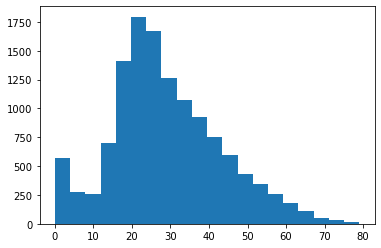

In [9]:
plt.hist(df['Age'], bins=20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [11]:
df[df['Age'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,True
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,9065_01,Mars,True,F/1755/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jet Bart,NaN
4216,9147_01,Earth,True,G/1490/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Gabrin Meyersones,NaN
4229,9177_02,Europa,True,C/306/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Zedarga Vablug,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN


# How to deal with missing data is nontrivial

People will discuss this endlessly how to deal with missing data, it's a big topic

### Options:

1. delete all rows that are missing this value
1. create a dummy value like "unknown"
1. for numerical values, fill it with a value (like the mean of the other rows)
1. use machine learning to fill in the missing value with the most likely candidate (adv)
1. Or your choice, be creative

In [12]:
df['HomePlanet'].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [13]:
df[df['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,8621_01,NaN,False,E/552/P,TRAPPIST-1e,19.0,False,4.0,0.0,1604.0,0.0,0.0,Vanley Simmonders,NaN
3980,8678_01,NaN,True,G/1399/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Eilan Kellson,NaN
4032,8775_01,NaN,True,D/275/P,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Raston Maltorted,NaN
4159,9025_01,NaN,False,G/1454/S,TRAPPIST-1e,42.0,False,0.0,0.0,28.0,726.0,0.0,Ale Whitersone,NaN


In [14]:
df['HomePlanet'].fillna('Earth', inplace=True)

In [15]:
df['HomePlanet'].value_counts()

Earth     7153
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [16]:
df['CryoSleep'].value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

In [17]:
df['CryoSleep'].fillna(False, inplace=True)

In [18]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [19]:
df['Destination'].fillna('Unknown', inplace=True)

In [20]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [21]:
df['VIP'].fillna(False, inplace=True)

In [22]:
df['RoomService'].fillna(0.0, inplace=True)

/Users/ross/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RoomService', ylabel='Density'>

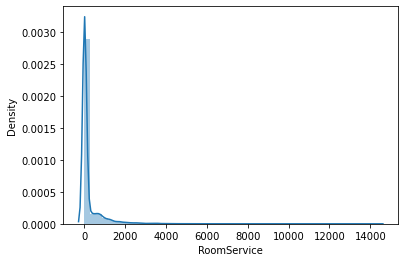

In [23]:
import seaborn as sns

sns.distplot(df['RoomService'])

In [24]:
df['FoodCourt'].value_counts()

0.0        8146
1.0         175
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: FoodCourt, Length: 1953, dtype: int64

In [25]:
df['FoodCourt'].fillna(0.0, inplace=True)

In [26]:
df['ShoppingMall'].fillna(0.0, inplace=True)

In [27]:
df['Spa'].fillna(0.0, inplace=True)

In [28]:
df['VRDeck'].fillna(0.0, inplace=True)

In [29]:
df['Name'].fillna('Did not fill it out, losers', inplace=True)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12970 non-null  bool   
 3   Cabin         12970 non-null  object 
 4   Destination   12970 non-null  object 
 5   Age           12970 non-null  float64
 6   VIP           12970 non-null  bool   
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12970 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: bool(2), float64(6), object(6)
memory usage: 1.3+ MB


In [31]:
# This will make a copy of df['Age'] but not change the original dataframe

# df['Age'].fillna(df['Age'].mean())

In [32]:
# This will fill in the missing values for df['Age'] in place, modifying the original

# df['Age'].fillna(df['Age'].mean(), inplace=True)

In [33]:
# This is identical to the above cell

# df['Age'] = df['Age'].fillna(df['Age'].mean())

In [34]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,Unknown,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,Unknown,28.771969,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.000000,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


### Option 2: throw out rows with missing data

Those people who forgot to enter their age don't deserve to be in our ML model

In [35]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,Unknown,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,Unknown,28.771969,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.000000,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


In [36]:
# df['Age'].isnull()

In [37]:
# ~df['Age'].isnull()

In [38]:
# df = df[~df['Age'].isnull()]

In [39]:
# df.dropna(how='any')

In [40]:
# This line is identical to the above line
#
# # df = df[~df['Age'].isnull()]

# df.dropna(subset=['Age'], how='any')

In [41]:
# df.tail()

## Or do something else, your time to be creative!

# For this exercise let's exercise the nuclear option
### in practice, you want to clean your data, don't do this for real life


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12970 non-null  bool   
 3   Cabin         12970 non-null  object 
 4   Destination   12970 non-null  object 
 5   Age           12970 non-null  float64
 6   VIP           12970 non-null  bool   
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12970 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: bool(2), float64(6), object(6)
memory usage: 1.3+ MB


# Now let's switch to modeling

In [43]:
my_columns = list(df.columns)
my_columns.remove('Transported')
my_columns

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [44]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [45]:
df['HomePlanet'].value_counts()

Earth     7153
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

# How do we deal with categorical variables

In [46]:
df['HomePlanet']

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
4272     Earth
4273     Earth
4274      Mars
4275    Europa
4276     Earth
Name: HomePlanet, Length: 12970, dtype: object

In [47]:
df['Age']

0       39.000000
1       24.000000
2       58.000000
3       33.000000
4       16.000000
          ...    
4272    34.000000
4273    42.000000
4274    28.771969
4275    28.771969
4276    43.000000
Name: Age, Length: 12970, dtype: float64

In [48]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# One hot encoding of categorical variables

In [49]:
df['HomePlanet']

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
4272     Earth
4273     Earth
4274      Mars
4275    Europa
4276     Earth
Name: HomePlanet, Length: 12970, dtype: object

# `drop_first` is to avoid a problem called multicollinearity that affects many (but not all) ML models

In [50]:
pd.get_dummies(df['HomePlanet'], drop_first=True)



,Europa,Mars
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
4272,0,0
4273,0,0
4274,0,1
4275,1,0


# Let's get a list of categorical variables we want to plug into a machine learning model

We want to turn it from a categorical variable to a numerical model

In [51]:
df.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [52]:
df['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Unknown           274
Name: Destination, dtype: int64

In [53]:
df['HomePlanet'].value_counts()

Earth     7153
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [54]:
df['VIP'].value_counts()

False    12697
True       273
Name: VIP, dtype: int64

In [55]:
df['RoomService'].value_counts()

0.0       8566
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
263.0        1
271.0        1
922.0        1
3905.0       1
652.0        1
Name: RoomService, Length: 1578, dtype: int64

In [56]:
df['CryoSleep'] = df['CryoSleep'].astype(bool)
df['VIP'] = df['VIP'].astype(bool)


# NOTE: DO not do the following line:

`df['Transported'] = df['Transported'].astype(bool)`


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12970 non-null  bool   
 3   Cabin         12970 non-null  object 
 4   Destination   12970 non-null  object 
 5   Age           12970 non-null  float64
 6   VIP           12970 non-null  bool   
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12970 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: bool(2), float64(6), object(6)
memory usage: 1.3+ MB


In [58]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [59]:
categorical_columns = ['HomePlanet',  'Destination']

In [60]:
df[['HomePlanet',  'Destination']]

,HomePlanet,Destination
0,Europa,TRAPPIST-1e
1,Earth,TRAPPIST-1e
2,Europa,TRAPPIST-1e
3,Europa,TRAPPIST-1e
4,Earth,TRAPPIST-1e
...,...,...
4272,Earth,TRAPPIST-1e
4273,Earth,TRAPPIST-1e
4274,Mars,55 Cancri e
4275,Europa,Unknown


In [61]:
df_categorical = pd.get_dummies(df[categorical_columns], drop_first=True)

In [62]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [63]:
df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,1,0
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,1,0
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,0,1,0
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,0,1,0
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,1,0


In [64]:
df.columns

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Destination_Unknown'],
      dtype='object')

# Let X be the variables we feel comfortable plugging into a machine learning model (in other word, numbers!)

Stuff we don't want: 

'PassengerID', 'Name', 'Transported'

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                12970 non-null  object 
 1   CryoSleep                  12970 non-null  bool   
 2   Cabin                      12970 non-null  object 
 3   Age                        12970 non-null  float64
 4   VIP                        12970 non-null  bool   
 5   RoomService                12970 non-null  float64
 6   FoodCourt                  12970 non-null  float64
 7   ShoppingMall               12970 non-null  float64
 8   Spa                        12970 non-null  float64
 9   VRDeck                     12970 non-null  float64
 10  Name                       12970 non-null  object 
 11  Transported                8693 non-null   object 
 12  HomePlanet_Europa          12970 non-null  uint8  
 13  HomePlanet_Mars            12970 non-null  uint

### Split this back into train and test sets

We concated them back at the beginning for easy data processing

In [66]:
df_train = df[0:8693]
df_test = df[8693:]

In [67]:
df_train.tail()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
8688,9276_01,False,A/98/P,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1,0,0,0,0
8689,9278_01,True,G/1499/S,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,0,1,0,0
8690,9279_01,False,G/1500/S,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,0,0,1,0
8691,9280_01,False,E/608/S,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,0,0,0,0
8692,9280_02,False,E/608/S,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,1,0,0,1,0


In [68]:
df_test.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0013_01,True,G/3/S,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,NaN,0,0,0,1,0
1,0018_01,False,F/4/S,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,NaN,0,0,0,1,0
2,0019_01,True,C/0/S,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN,1,0,0,0,0
3,0021_01,False,C/1/S,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,NaN,1,0,0,1,0
4,0023_01,False,F/5/S,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,NaN,0,0,0,1,0


In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   bool   
 2   Cabin                      8693 non-null   object 
 3   Age                        8693 non-null   float64
 4   VIP                        8693 non-null   bool   
 5   RoomService                8693 non-null   float64
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8693 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Name                       8693 non-null   object 
 11  Transported                8693 non-null   object 
 12  HomePlanet_Europa          8693 non-null   uint8  
 13  HomePlanet_Mars            8693 non-null   uint8

In [70]:
df_test.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0013_01,True,G/3/S,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,NaN,0,0,0,1,0
1,0018_01,False,F/4/S,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,NaN,0,0,0,1,0
2,0019_01,True,C/0/S,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN,1,0,0,0,0
3,0021_01,False,C/1/S,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,NaN,1,0,0,1,0
4,0023_01,False,F/5/S,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,NaN,0,0,0,1,0


# What are we doing here? 

We want to take our labelled data, `df_train`, and split it into the predictor variables `X`, and the value we want to predict, `y`

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   bool   
 2   Cabin                      8693 non-null   object 
 3   Age                        8693 non-null   float64
 4   VIP                        8693 non-null   bool   
 5   RoomService                8693 non-null   float64
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8693 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Name                       8693 non-null   object 
 11  Transported                8693 non-null   object 
 12  HomePlanet_Europa          8693 non-null   uint8  
 13  HomePlanet_Mars            8693 non-null   uint8

In [72]:
df_train.columns

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Destination_Unknown'],
      dtype='object')

In [73]:
# Whatever we want to throw into the model (besides transported), we put in X

X = df_train[['CryoSleep', 'Age', 'VIP', 'RoomService',
              'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
              'HomePlanet_Europa', 'HomePlanet_Mars', 
              'Destination_PSO J318.5-22',
              'Destination_TRAPPIST-1e', 
              'Destination_Unknown']]

X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,0,0,1,0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1,0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,0,0,0,1,0
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0,0


In [74]:
y = df_train['Transported']

In [75]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: object

In [76]:
y.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [77]:
y = y.astype(bool)

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   HomePlanet_Europa          8693 non-null   uint8  
 9   HomePlanet_Mars            8693 non-null   uint8  
 10  Destination_PSO J318.5-22  8693 non-null   uint8  
 11  Destination_TRAPPIST-1e    8693 non-null   uint8  
 12  Destination_Unknown        8693 non-null   uint8  
dtypes: bool(2), float64(6), uint8(5)
memory usage: 5

Training data is data for which you have labeled (Transported is labeled), `train.csv`

Testing data (inference) is data for which you have not labeled, `test.csv`


Before ever doing inference on unknown data, you normally split your training data into 
a training set and a validation set

- Train (labeled)
    - Training set
    - Validation set (also called holdout set or, confusingly, test data)
    
    
- Test (unlabeled)


In [79]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [80]:
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
2426,False,37.0,False,27.0,0.0,1131.0,0.0,1318.0,0,1,0,1,0
4035,False,6.0,False,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
7540,False,39.0,False,1369.0,259.0,960.0,1.0,29.0,0,1,0,1,0
7806,False,33.0,False,988.0,0.0,0.0,2274.0,3098.0,1,0,0,0,0
7683,False,39.0,False,19.0,3603.0,0.0,421.0,517.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,False,24.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
2139,True,22.0,False,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
2223,False,11.0,False,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5318,False,38.0,False,0.0,1198.0,48.0,278.0,1244.0,1,0,0,0,0


In [81]:
y_train

2426    False
4035     True
7540    False
7806    False
7683     True
        ...  
5102     True
2139     True
2223     True
5318    False
117     False
Name: Transported, Length: 6954, dtype: bool

# Before sklearn how people declared models was complete anarchy!!!

But now it's standardized

If this doesn't converge, up the number of iterations

In [83]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
y_pred = model.predict(X_val)

In [89]:
accuracy_score(y_val, y_pred)

0.7849338700402531

In [90]:
roc_auc_score(y_val, y_pred)

0.7847571156039232

In [92]:
f1_score(y_val, y_pred)

0.7898876404494383

In [93]:
df_test

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0013_01,True,G/3/S,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,NaN,0,0,0,1,0
1,0018_01,False,F/4/S,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,NaN,0,0,0,1,0
2,0019_01,True,C/0/S,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN,1,0,0,0,0
3,0021_01,False,C/1/S,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,NaN,1,0,0,1,0
4,0023_01,False,F/5/S,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,NaN,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,G/1496/S,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,0,0,0,1,0
4273,9269_01,False,Unknown,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,0,0,0,1,0
4274,9271_01,True,D/296/P,28.771969,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,0,1,0,0,0
4275,9273_01,False,D/297/P,28.771969,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,1,0,0,0,1


# Things to try

- new models: random forest, gradient boosting
    - xgboost, light gradient boosting
- different/better data analysis, features
- preprocessing, scale your inputs